# Part I - Telecom Customer Churn Data Exploration

## Chisom Promise Nnamani

Customer churn is one of the most important metrics for a growing business to evaluate. While it's not the happiest measure, it's a number that can give your company the hard truth about its customer retention.

### Context

With the rapid development of telecommunication industry, the service providers are inclined more towards expansion of the subscriber base. To meet the need of surviving in the competitive environment, the retention of existing customers has become a huge challenge. It is stated that the cost of acquiring a new customer is far more than that for retaining the existing one. Therefore, it is imperative for the telecom industries to use advanced analytics to understand consumer behavior and in-turn predict the association of the customers as whether or not they will leave the company.

This dataset was sourced from Kaggle and can be obtained via this [link](https://www.kaggle.com/datasets/barun2104/telecom-churn)

### Content

This data set contains customer level information for a telecom company. Various attributes related to the services used are recorded for each customer.

### Inspiration

Some possible insights could be -

 1. What variables are contributing to customer churn?
 
 
 2. Who are the customers more likely to churn?
 

 3. What actions can be taken to stop them from leaving?
 

## Preliminary Wrangling

## Assessing the Telecom Company Data

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
# load in the dataset into a pandas dataframe, print statistics
customer_data = pd.read_csv('telecom_churn.csv')

# display five columns of our dataset in a dataframe
customer_data.head()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Column Description:

Each row represents a customer and each column contains attributes related to customer as described in the column description.

The “Churn” column is our target variable.

 - **Churn:** 1 if customer cancelled service, 0 if not
 
 
 - **AccountWeeks:** number of weeks customer has had active account
 
 
 - **ContractRenewal:** 1 if customer recently renewed contract, 0 if not
 
 
 - **DataPlan:** 1 if customer has data plan, 0 if not
 

 - **DataUsage:** gigabytes of monthly data usage
 

 - **CustServCalls:** number of calls into customer service
 

 - **DayMins:** average daytime minutes per month
 

 - **DayCalls:** average number of daytime calls
 

 - **MonthlyCharge:** average monthly bill
 

 - **OverageFee:** largest overage fee in last 12 months
 

 - **RoamMins:** average number of roaming minutes

In [3]:
# Checking the number or the rows and columns in our dataframe
customer_data.shape

(3333, 11)

In [4]:
# Checking the information in our data
customer_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Churn            3333 non-null   int64  
 1   AccountWeeks     3333 non-null   int64  
 2   ContractRenewal  3333 non-null   int64  
 3   DataPlan         3333 non-null   int64  
 4   DataUsage        3333 non-null   float64
 5   CustServCalls    3333 non-null   int64  
 6   DayMins          3333 non-null   float64
 7   DayCalls         3333 non-null   int64  
 8   MonthlyCharge    3333 non-null   float64
 9   OverageFee       3333 non-null   float64
 10  RoamMins         3333 non-null   float64
dtypes: float64(5), int64(6)
memory usage: 286.6 KB


In [5]:
customer_data.isnull().sum()

Churn              0
AccountWeeks       0
ContractRenewal    0
DataPlan           0
DataUsage          0
CustServCalls      0
DayMins            0
DayCalls           0
MonthlyCharge      0
OverageFee         0
RoamMins           0
dtype: int64

We do not have any missing values in our dataset.

In [6]:
# sometimes, empty value are represented with "None"
# using "apply" to search for "None" in all dataframe columns

substring = 'none'
customer_data[customer_data.apply(lambda row: row.astype(str).str.contains(substring, case=False).any(),
                                  axis=1)]

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins


So there are really no column with missing values

In [7]:
# Checking for duplicate rows
customer_data.duplicated().any()

False

We do not have any duplicate rows in our dataframe

In [8]:
# Checking the summary of our numerical columns
customer_data.describe()

,Churn,AccountWeeks,ContractRenewal,DataPlan,DataUsage,CustServCalls,DayMins,DayCalls,MonthlyCharge,OverageFee,RoamMins
count,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000,3333.000000
mean,0.144914,101.064806,0.903090,0.276628,0.816475,1.562856,179.775098,100.435644,56.305161,10.051488,10.237294
std,0.352067,39.822106,0.295879,0.447398,1.272668,1.315491,54.467389,20.069084,16.426032,2.535712,2.791840
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,14.000000,0.000000,0.000000
25%,0.000000,74.000000,1.000000,0.000000,0.000000,1.000000,143.700000,87.000000,45.000000,8.330000,8.500000
50%,0.000000,101.000000,1.000000,0.000000,0.000000,1.000000,179.400000,101.000000,53.500000,10.070000,10.300000
75%,0.000000,127.000000,1.000000,1.000000,1.780000,2.000000,216.400000,114.000000,66.200000,11.770000,12.100000
max,1.000000,243.000000,1.000000,1.000000,5.400000,9.000000,350.800000,165.000000,111.300000,18.190000,20.000000


### Issues

 - columns names are not fit for programming
    
 - the values used to represent Churn, Customer Renewal and Data Plan columns aren't definning enough

## Cleaning the Telecom Company Data

In [9]:
# making copy of original data
customer_info = customer_data.copy()

### Issue

columns names are not fit for programming

### Define

Seperate the column labels that are made up two words with an underscore.

Change the name of the column labels to lower case

### Code

In [10]:
# Seperate the column labels that are made up two words with a hyphen
customer_info.rename(columns={'AccountWeeks': 'Account_Weeks', 'ContractRenewal': 'Contract_Renewal',
                              'DataPlan': 'Data_Plan', 'DataUsage': 'Data_Usage',
                              'CustServCalls': 'Customer_Service_Calls', 'DayMins': 'Day_Mins', 'DayCalls': 'Day_Calls',
                              'MonthlyCharge': 'Monthly_Charge', 'OverageFee': 'Overage_Fee', 'RoamMins': 'Roam_Mins'}, inplace = True)

# change the name of the column labels to lower case
customer_info.rename(columns=lambda x: x.lower(), inplace=True)

### Test

In [11]:
customer_info.head()

,churn,account_weeks,contract_renewal,data_plan,data_usage,customer_service_calls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins
0,0,128,1,1,2.7,1,265.1,110,89.0,9.87,10.0
1,0,107,1,1,3.7,1,161.6,123,82.0,9.78,13.7
2,0,137,1,0,0.0,0,243.4,114,52.0,6.06,12.2
3,0,84,0,0,0.0,2,299.4,71,57.0,3.10,6.6
4,0,75,0,0,0.0,3,166.7,113,41.0,7.42,10.1


### Issue

The values used to represent churn, customer renewal and data plan columns aren't definning enough

### Define

Replace the 1 and 0 values in churn, customer_renewal, and data_plan columns with unique values that do convey their meanings.

### Code

In [12]:
# change the value of the churn, contract_renewal, and data_plan for easy manipulation
customer_info['churn'] = np.where(customer_info['churn'] == 1, 'Cancelled', 'Not Cancelled')
customer_info['contract_renewal'] = np.where(customer_info['contract_renewal'] == 1, 'Renewed', 'Not Renewed')
customer_info['data_plan'] = np.where(customer_info['data_plan'] == 1, 'Data plan', 'No Data Plan')

### Test

In [13]:
customer_info.head()

,churn,account_weeks,contract_renewal,data_plan,data_usage,customer_service_calls,day_mins,day_calls,monthly_charge,overage_fee,roam_mins
0,Not Cancelled,128,Renewed,Data plan,2.7,1,265.1,110,89.0,9.87,10.0
1,Not Cancelled,107,Renewed,Data plan,3.7,1,161.6,123,82.0,9.78,13.7
2,Not Cancelled,137,Renewed,No Data Plan,0.0,0,243.4,114,52.0,6.06,12.2
3,Not Cancelled,84,Not Renewed,No Data Plan,0.0,2,299.4,71,57.0,3.10,6.6
4,Not Cancelled,75,Not Renewed,No Data Plan,0.0,3,166.7,113,41.0,7.42,10.1


In [14]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   churn                   3333 non-null   object 
 1   account_weeks           3333 non-null   int64  
 2   contract_renewal        3333 non-null   object 
 3   data_plan               3333 non-null   object 
 4   data_usage              3333 non-null   float64
 5   customer_service_calls  3333 non-null   int64  
 6   day_mins                3333 non-null   float64
 7   day_calls               3333 non-null   int64  
 8   monthly_charge          3333 non-null   float64
 9   overage_fee             3333 non-null   float64
 10  roam_mins               3333 non-null   float64
dtypes: float64(5), int64(3), object(3)
memory usage: 286.6+ KB


The churn, contract_renewal, and data_plan columns are now in object data type. Let's convert them to Categorical data type.

In [15]:
# change churn, customer_renewal, and data__plan values into category data type
cat_col = ['churn', 'contract_renewal', 'data_plan']
customer_info[cat_col] = customer_info[cat_col].astype('category')

In [16]:
customer_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   churn                   3333 non-null   category
 1   account_weeks           3333 non-null   int64   
 2   contract_renewal        3333 non-null   category
 3   data_plan               3333 non-null   category
 4   data_usage              3333 non-null   float64 
 5   customer_service_calls  3333 non-null   int64   
 6   day_mins                3333 non-null   float64 
 7   day_calls               3333 non-null   int64   
 8   monthly_charge          3333 non-null   float64 
 9   overage_fee             3333 non-null   float64 
 10  roam_mins               3333 non-null   float64 
dtypes: category(3), float64(5), int64(3)
memory usage: 218.6 KB


### What is the structure of your dataset?

There are **3333 rows** representing each customer, with **11** features or variables.

8 of the features which include (account_weeks, data_usage, customer_service_calls, day_mins, day_calls, monthly_charge, overage_fee. roam_mins) are numerical data types, while the other 3 which are (churn, contract_renewal, and data plan) are in categorical data type.

### What is/are the main feature(s) of interest in your dataset?

I'm most interested in figuring out what features are best for predicting the customer churn in the dataset. i.e how each of the other features determines if the will stay or leave the telecom company.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

I expect that Data plan will have the strongest effect on customer churn: the more data plans suscribed, the more likely the customer will stay with the Telecom company. I also think that other variables like the AccountWeeks, ContractRenewal, DataUsage, CustServCalls, DayMins, DayCalls, MonthlyCharge, OverageFee, and RoamMins will also have effect on retention or losing of customers.

## Univariate Analysis

**A: For Categorical Variable**

**I will start looking at the main variable of interest - Churn, followed by Contract renewal and Data plan**

In [17]:
# creating a function to create a countplot into a subplot for a given category variable

color = sns.color_palette()[0]
def count_plot(cat):
    if cat == 'churn':
        sns.countplot(data=customer_info, x = cat, color=color)
        plt.xlabel('Churn')
        plt.title('Churn Distribution')
    elif cat == 'contract_renewal':
        sns.countplot(data = customer_info, x  = cat, color=color)
        plt.xlabel('Contract Renewal');
        plt.title('Contract Renewal Distribution')
    else:
        sns.countplot(data = customer_info, x = cat, color=color)
        plt.xlabel('Data Plan');
        plt.title('Data Plan Distribution')

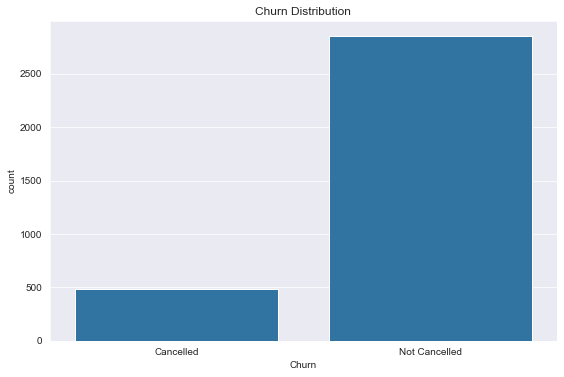

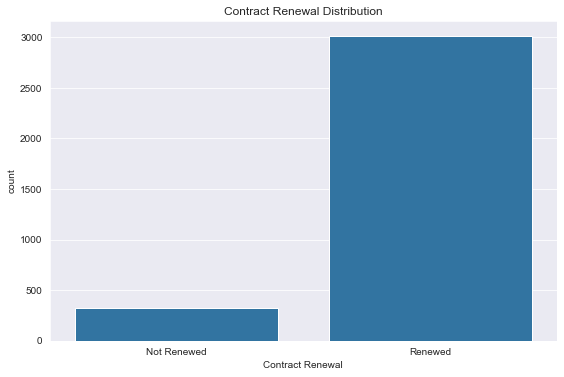

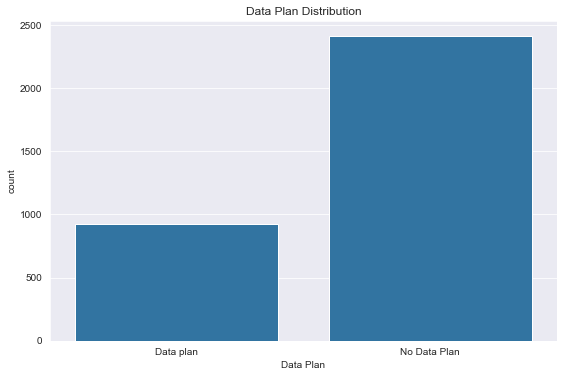

In [18]:
# iterataing through a list of categorical variabale for plotting.

cat_list = ['churn', 'contract_renewal', 'data_plan']
for cat_name in cat_list:
    plt.figure(figsize=(20, 20))
    sns.set_style('darkgrid')
    plt.subplot(3, 2, 1)
    count_plot(cat_name)

Let's supplement the graphical charts of the categorical variables with descriptive statistics to ensure we arrive at the right conclusion.

***For the 'Churn' variable: How high is the proprotion of customers which cancelled the service?***

In [19]:
# let's get the value count of each churn value in a data frame
print(pd.DataFrame(customer_info['churn'].value_counts()))

# let's get the percentage of each churn value count
print(pd.DataFrame(customer_info['churn'].value_counts(normalize=True)*100))

               churn
Not Cancelled   2850
Cancelled        483
                   churn
Not Cancelled  85.508551
Cancelled      14.491449


From the chart and the descriptive statistics of the "Churn" column above, we can see that **483(14.4%) customers were lost** by the telecom company, and **more than 2500(85.5%) were retained by the company**. 483 might seem a small number but that number could have fetch good profit for the Telecom company.

***For the 'Contract Renewal' variable: How many customers recently renewed their contract?***

In [20]:
# let's get the value count of each contract renewal value in a data frame
print(pd.DataFrame(customer_info['contract_renewal'].value_counts()))

# let's get the percentage of each contract renewal value count
print(pd.DataFrame(customer_info['contract_renewal'].value_counts(normalize=True)*100))

             contract_renewal
Renewed                  3010
Not Renewed               323
             contract_renewal
Renewed             90.309031
Not Renewed          9.690969


From the chart and the descriptive statistics of the "Contract Renewal" column above, we can see that **323(9.7%) customers did not renew their contract**, and **3010(90%) recently renewed their contract**. 

***For the 'Data Plan' variable: How many customers had data plan and how many did not?***

In [21]:
# let's get the value count of each data plan value in a data frame
print(pd.DataFrame(customer_info['data_plan'].value_counts()))

# let's get the percentage of each contract renewal value count
print(pd.DataFrame(customer_info['data_plan'].value_counts(normalize=True)*100))

              data_plan
No Data Plan       2411
Data plan           922
              data_plan
No Data Plan  72.337234
Data plan     27.662766


From the chart above, with the this descriptive statistics of the data plan column, we can see that only **922(27.6%) of the customers have** data plan while **2411(72%) of the customers do not** have data plan. 

**B: For Numeric Variables**

In [22]:
# Plottting the histograms of the numerical variables or columns using subplot

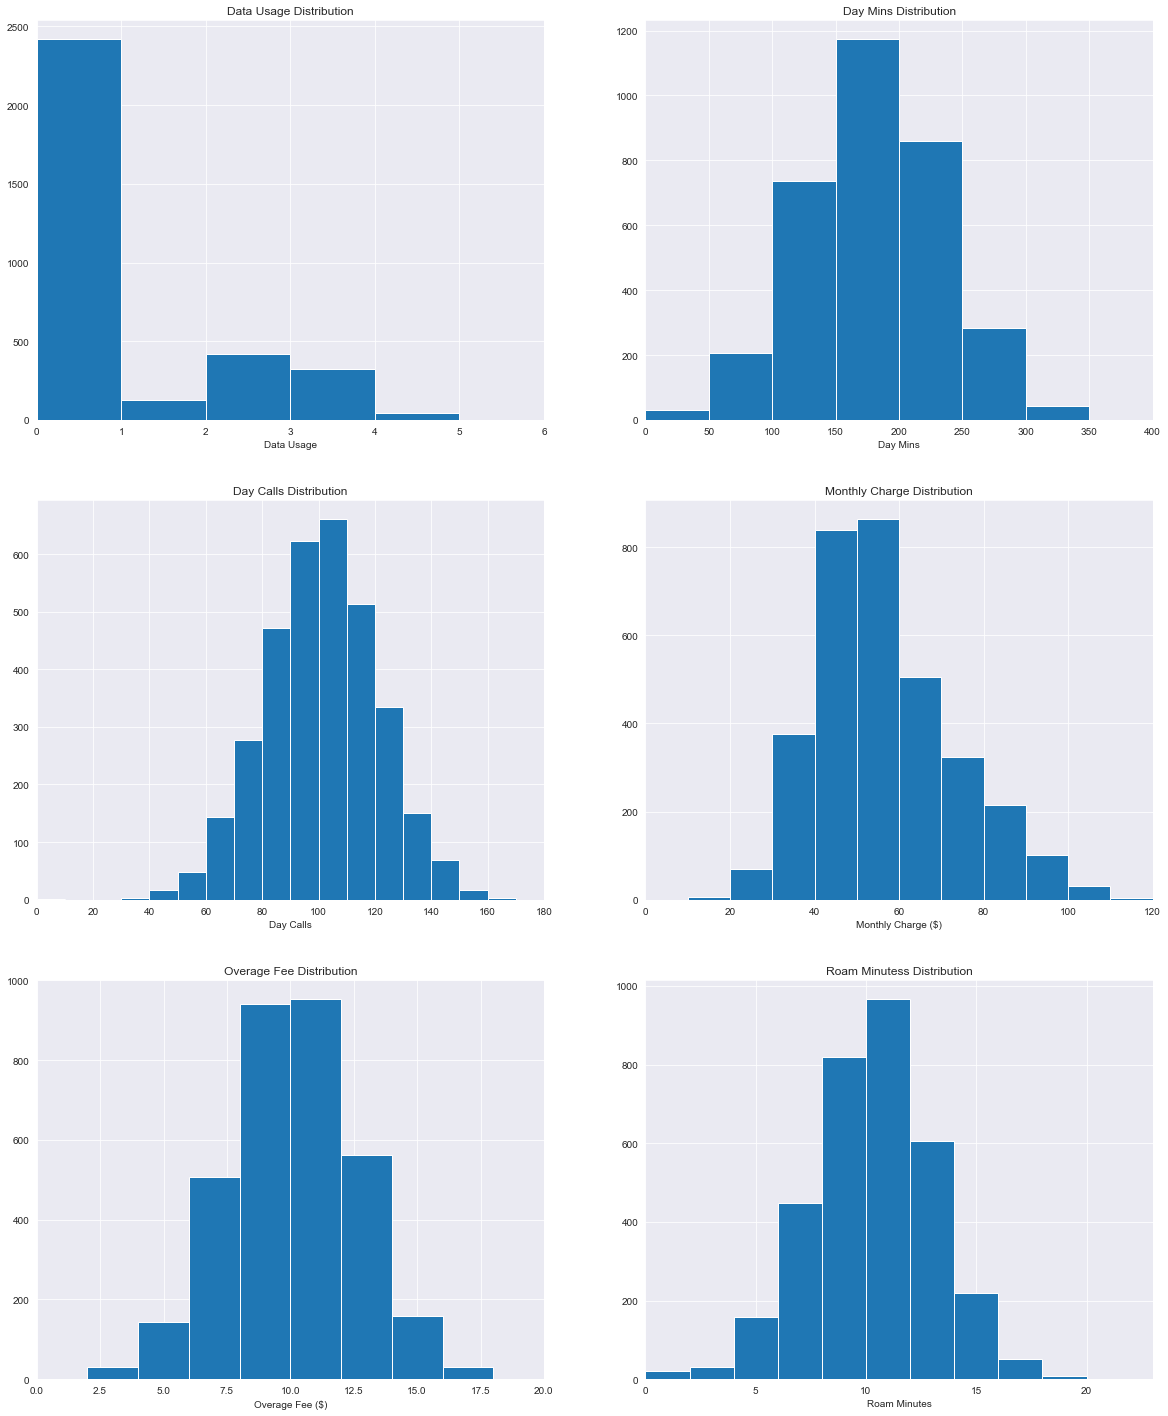

In [23]:
# set a figure size for the subplots
plt.figure(figsize= [20, 25])

# histograms on left
plt.subplot(3,2,1)
bins = np.arange(0, customer_info['data_usage'].max()+1, 1);
plt.hist(data=customer_info, x='data_usage', bins = bins);
plt.xlim(0, 6);
plt.title('Data Usage Distribution')
plt.xlabel('Data Usage')

plt.subplot(3,2,2)
bins = np.arange(0, customer_info['day_mins'].max()+50, 50);
plt.hist(data=customer_info, x='day_mins', bins = bins);
plt.xlim(0, 400);
plt.title('Day Mins Distribution')
plt.xlabel('Day Mins')

plt.subplot(3,2,3)
bins = np.arange(0, customer_info['day_calls'].max()+10, 10);
plt.hist(data=customer_info, x='day_calls', bins = bins);
plt.xlim(0, 180);
plt.title('Day Calls Distribution')
plt.xlabel('Day Calls')

plt.subplot(3,2,4)
bins = np.arange(10, customer_info['monthly_charge'].max()+10, 10);
plt.hist(data=customer_info, x='monthly_charge', bins = bins);
plt.xlim(0, 120);
plt.title('Monthly Charge Distribution')
plt.xlabel('Monthly Charge ($)')

plt.subplot(3,2,5)
bins = np.arange(0, customer_info['overage_fee'].max()+2, 2);
plt.hist(data=customer_info, x='overage_fee', bins = bins);
plt.xlim(0, 20);
plt.title('Overage Fee Distribution')
plt.xlabel('Overage Fee ($)')

plt.subplot(3,2,6) 
bins = np.arange(0, customer_info['roam_mins'].max()+2, 2);
plt.hist(data=customer_info, x='roam_mins', bins = bins);
plt.xlim(0, 23);
plt.title('Roam Minutess Distribution')
plt.xlabel('Roam Minutes');

**Let's look into what's going on in the histogram plots of the various variables**

**For the data usage hist plot:** This is the gigabytes of monthly data usage. The plot is skewed to the right, with the highest data usage value being **0**. This means that about **2500** customers did not subscribe or use any data monthly. 

**For the day mins hist plot:** This is the average daytime minutes per month. There is a normal distribution in the plot which shows that most of the customers, about 1200 spend at most **150 to 200 minutes** per day.

**For day calls hist plot:** This is the average number of calls per day. From the plot, we could see that on average, more than **600** of its customers make the average of **90 to 110 calls** per day, which is the highest average number of calls, while the least amount of calls is 0 t0 30.

**For monthly charge hist plot:** This is the average monthly bill by the company. The plot is slightly skewed to the right, with most of its customers (more than 800) being charges **40 to 60 dollars** monthly.

**For the overage fee hist plot:** Overage fee is the fee for the extra minutes. The plot shows a normal distribution with the peak at the center and most of the customers being charged about **7.5 to 12.5 dollars**.

**For the Roam minutes hist plot:** The plot is skewed to the left with with about 1000 of its customers spending about 9 to 12 minutes in roam minutes.

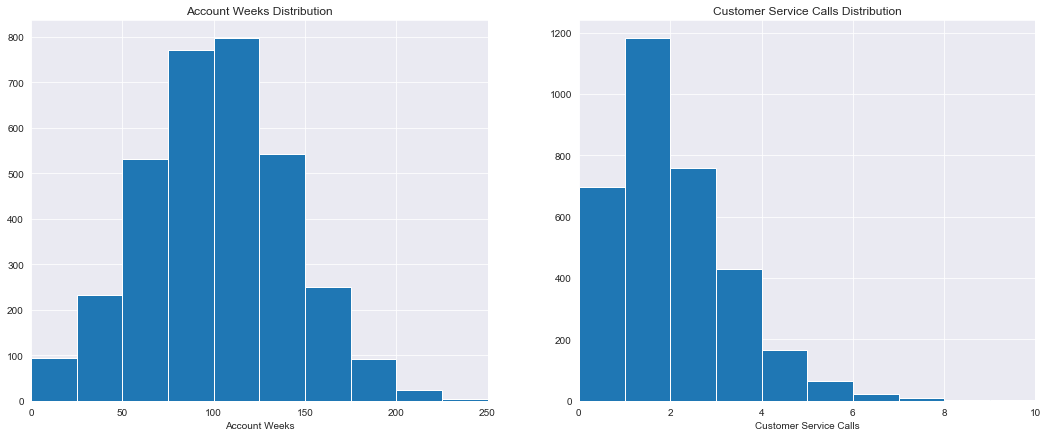

In [24]:
plt.figure(figsize = [18, 7])

plt.subplot(1, 2, 1)
bins = np.arange(0, customer_info['account_weeks'].max()+25, 25);
plt.hist(data=customer_info, x='account_weeks', bins = bins);
plt.xlim(0, 250);
plt.title('Account Weeks Distribution')
plt.xlabel('Account Weeks')

plt.subplot(1, 2, 2)
bins = np.arange(0, customer_info['customer_service_calls'].max()+1.1, 1);
plt.hist(data=customer_info, x='customer_service_calls', bins = bins);
plt.xlim(0, 10);
plt.title('Customer Service Calls Distribution')
plt.xlabel('Customer Service Calls');

**For the account weeks hist plot:** The plot is slightly skewd, almost normal, with about 800 of its customer having active account weeks for about 75 to 125 weeks, which is are the number of weeks that occured most.

**For the customer service calls plot:** For the customer service calls plot: The plot is skewed to the right, with about 1200 customers making up to 2 customer service calls per day.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

From the chart and the descriptive statistics of the "Churn" column above, we can see that **483(14.4%) customers were lost** by the telecom company, and **more than 2500(85.5%)** were retained by the company.

The price variable took on a large range of values, so I looked at the data using a log transform. Under the transformation, the data looked bimodal, with one peak between  500𝑎𝑛𝑑 1000, and another just below $5000.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

When looking at the data usage, I noticed that the the plot  is slightly skewed to the righ, having more values on the lower end which is 0. I also noticed that the plot also correlates with the data plan plot, because most of the customers had no data plan. Who knows if these two have a strong correlation? We will see...

## Bivariate Analysis

**A: For Categorical Variables**

In this section, I will investigate relationships between pairs of variables in the data. I will start by plotting the relationship between categorical variables in the data. then move on to numeric variables.

In [25]:
# creating a function that plots a heatmap for two categorical variables
def heat_map(cat_1, cat_2):
    plt.figure(figsize = (8,7))
    # Use group_by() and size() to get number of values in each category
    ct_counts = customer_info.groupby([cat_1, cat_2]).size()

    # Use series.reset_index() to convert a series into a dataframe object
    ct_counts = ct_counts.reset_index(name='count')

    # Use DataFrame.pivot() to rearrange the data, to have data plan values on rows
    ct_counts = ct_counts.pivot(index = cat_1, columns = cat_2, values = 'count')
    
    # plot the heatmap
    sns.heatmap(ct_counts, annot = True, fmt = '.1f', cmap = 'viridis_r');
    plt.title('Count of each {} in each {}'.format(cat_2, cat_1));

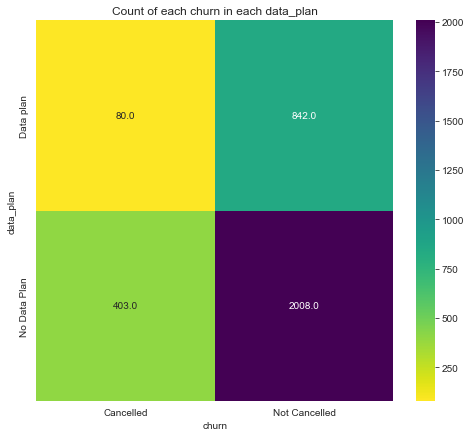

In [26]:
heat_map('data_plan', 'churn')

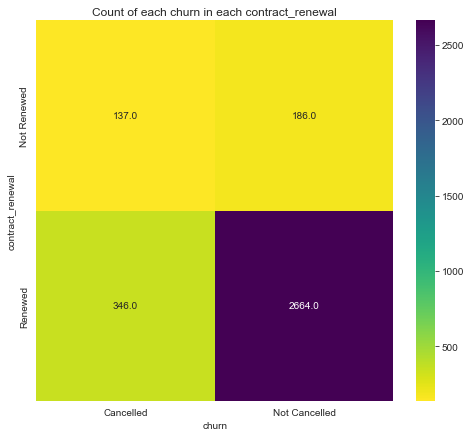

In [27]:
heat_map('contract_renewal', 'churn')

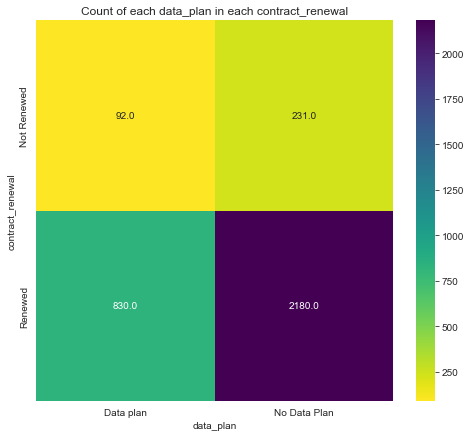

In [28]:
heat_map('contract_renewal', 'data_plan')

**Let's get the descriptive statistics to back up our categorical heat map plots above.**

In [29]:
# let's use groupby to compare data plan and churn value counts
print(pd.DataFrame(customer_info.groupby('data_plan')['churn'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('data_plan')['churn'].value_counts(normalize=True)*100))

                            churn
data_plan                        
Data plan    Not Cancelled    842
             Cancelled         80
No Data Plan Not Cancelled   2008
             Cancelled        403
                                churn
data_plan                            
Data plan    Not Cancelled  91.323210
             Cancelled       8.676790
No Data Plan Not Cancelled  83.284944
             Cancelled      16.715056


Interesting insight! From our descriptive statistics which backs up our heatmaps plot, we could see that about **80(8.5%)** of their customers who had data plans were still lost by the company. But a higher percentage of **403(16.7%**) who did not have data plan were lost by the company. This means more of customers would be lost if they do not have data plan.

In [30]:
# let's use groupby to compare data plan and churn value counts
print(pd.DataFrame(customer_info.groupby('contract_renewal')['churn'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('contract_renewal')['churn'].value_counts(normalize=True)*100))

                                churn
contract_renewal                     
Not Renewed      Not Cancelled    186
                 Cancelled        137
Renewed          Not Cancelled   2664
                 Cancelled        346
                                    churn
contract_renewal                         
Not Renewed      Not Cancelled  57.585139
                 Cancelled      42.414861
Renewed          Not Cancelled  88.504983
                 Cancelled      11.495017


From this descriptive statistics, we can see that about **137(42%)** of the customers who did not recently renewed their contract were lost by the company, while only about **346(11%)** of the customers who recently renwed their contract were lost by the company.

In [31]:
# let's use groupby to compare data plan and churn value counts
print(pd.DataFrame(customer_info.groupby('contract_renewal')['data_plan'].value_counts()))

# let's get the percentage
print(pd.DataFrame(customer_info.groupby('contract_renewal')['data_plan'].value_counts(normalize=True)*100))

                               data_plan
contract_renewal                        
Not Renewed      No Data Plan        231
                 Data plan            92
Renewed          No Data Plan       2180
                 Data plan           830
                               data_plan
contract_renewal                        
Not Renewed      No Data Plan  71.517028
                 Data plan     28.482972
Renewed          No Data Plan  72.425249
                 Data plan     27.574751


Okay! This is becoming interesting. From our descriptive statistics, we could see that **231(71%)** of the customers who had no data plan did not renew their contract, while only about **830(27%)** who had data plans renewed their contract.

**B: For Numeric Variables**

In this section, I will investigate relationships between pairs of numeric variables in the data.

In [32]:
def Relationship(num_var1, num_var2):
    sns.set(rc={"figure.figsize":(7, 7)})
    sns.regplot(data=customer_info, x=num_var1, y=num_var2, x_jitter=0.3, fit_reg=False, scatter_kws={'alpha':0.3})
    plt.title('{}'. format(num_var1 + ' vs '+ num_var2))

    if num_var1 == 'data_usage':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ')));
    elif num_var1 == 'monthly_charge':
        plt.xlabel('{} ($)'.format(num_var1.replace('_', ' ')));
    elif num_var1 == 'account_weeks':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ')));
    elif num_var1 == 'customer_service_calls':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ')));
    elif  num_var1 == 'day_mins':
        plt.xlabel('{} (mins)'.format(num_var1.replace('_', ' ')));
    elif num_var1 == 'day_calls':
        plt.xlabel('{}'.format(num_var1.replace('_', ' ')));
    elif num_var1 == 'overage_fee':
        plt.xlabel('{} ($)'.format(num_var1.replace('_', ' ')));
    else:
        plt.xlabel('{}'.format(num_var1.replace('_', ' ')));

    if num_var2 == 'data_usage':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ')))
    elif num_var1 == 'monthly_charge':
        plt.ylabel('{} ($)'.format(num_var2.replace('_', ' ')))
    elif num_var1 == 'account_weeks':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ')))
    elif num_var1 == 'customer_service_calls':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ')))
    elif  num_var1 == 'day_mins':
        plt.ylabel('{} (mins)'.format(num_var2.replace('_', ' ')))
    elif num_var1 == 'day_calls':
        plt.ylabel('{}'.format(num_var2.replace('_', ' ')))
    elif num_var1 == 'overage_fee':
        plt.ylabel('{} ($)'.format(num_var2.replace('_', ' ')))
    else:
        plt.ylabel('{}'.format(num_var2.replace('_', ' ')))

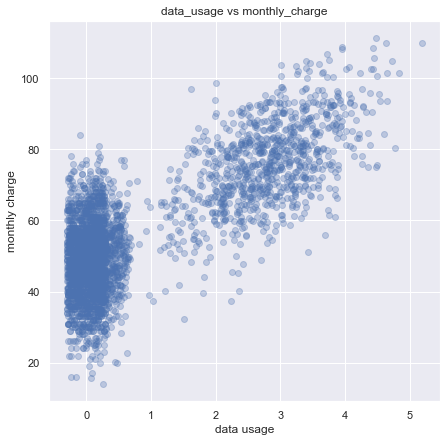

In [33]:
Relationship('data_usage', 'monthly_charge')

The plot shows a positive relationship between data usage and monthly charge, but still on the plot, we also notice that most of the customers who had 0 data usage were still charged high.

What could have caused this? Were they roaming freely? Let's see the next plot.

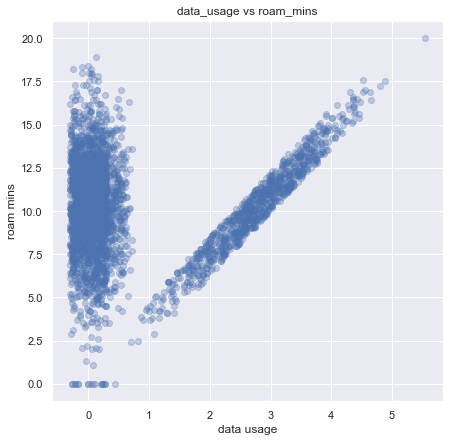

In [34]:
Relationship('data_usage', 'roam_mins')

Here we could see that data usage only slightly correlates with roam minutes. The majority of the data points are located at 0 data usage. This means most of the customers are mostly found roaming when they do not have data.

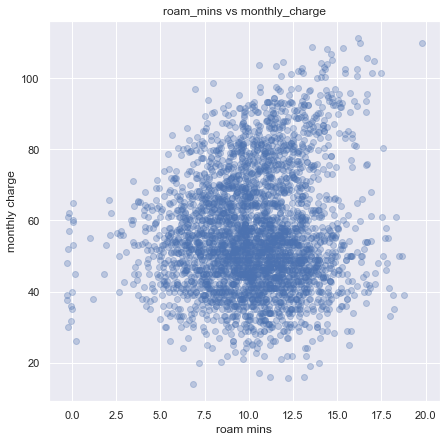

In [35]:
Relationship('roam_mins', 'monthly_charge')

That's why there's only a slight correlation between roam minutes and monthly charge. Remember, they roam when they have no data, and if they have no data, there is no data usage so it leads to little monthly charge.

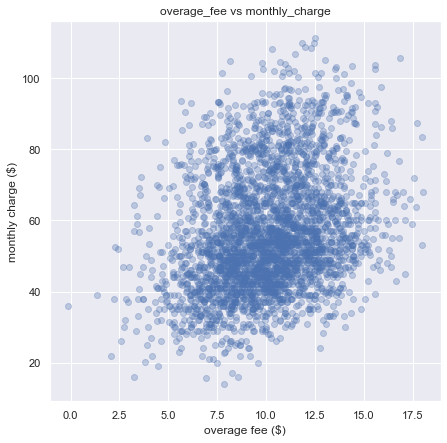

In [36]:
Relationship('overage_fee', 'monthly_charge')

This means that increase in overage fee slightly correlates with increase in monthly charge. 

**Let's use a heatmap to visualize all the numeric variables together.**

In [37]:
numeric_vars = ['account_weeks', 'data_usage','customer_service_calls', 'day_mins', 'day_calls', 'monthly_charge',
       'overage_fee', 'roam_mins']

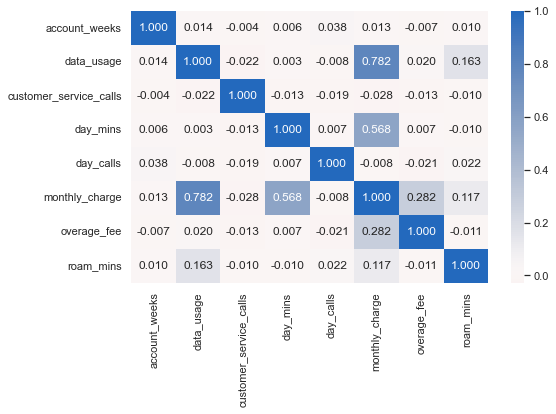

In [38]:
# correlation plot
plt.figure(figsize = [8, 5])
sns.heatmap(customer_info[numeric_vars].corr(), annot = True, fmt = '.3f',
           cmap = 'vlag_r', center = 0)
plt.show()

**Let's also use a plot matrix to display the relationship between all the numerical variables.**

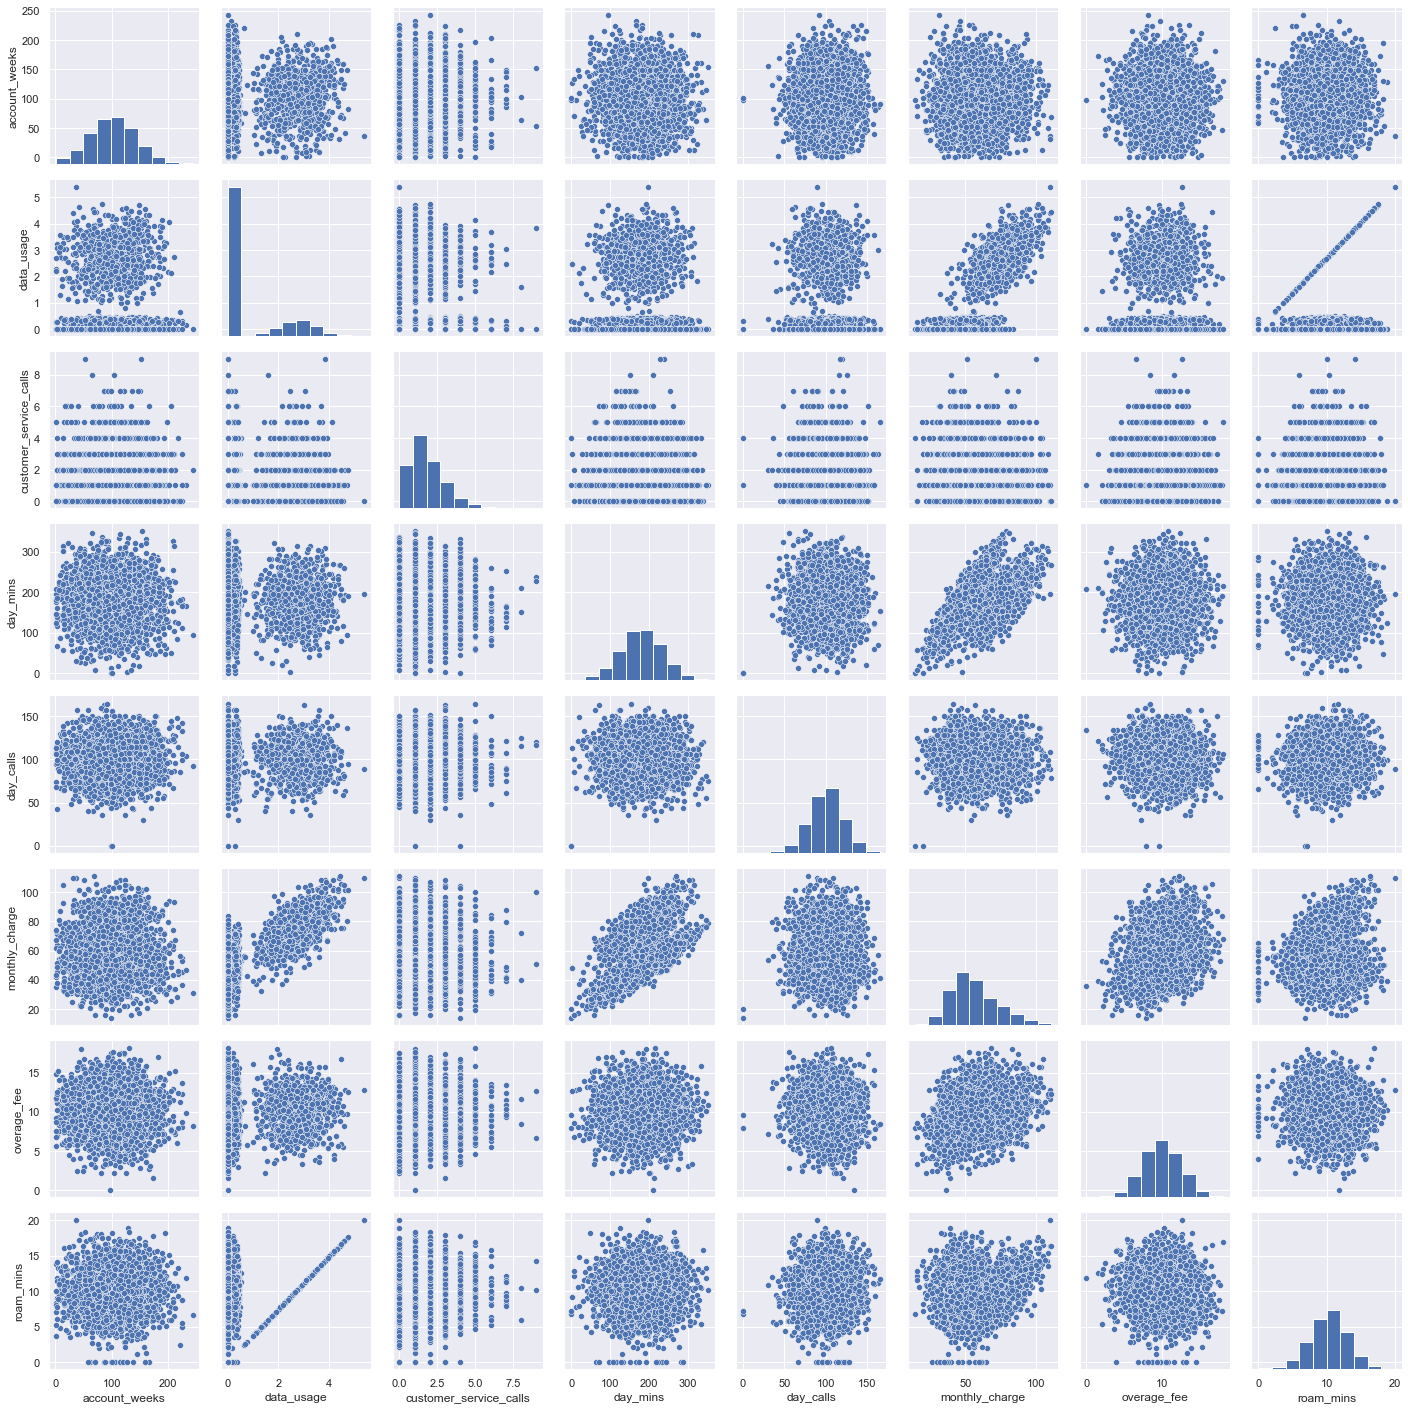

In [39]:
num_variables = ['account_weeks', 'data_usage', 'customer_service_calls', 'day_mins', 'day_calls', 'monthly_charge',
                 'overage_fee', 'roam_mins']

g = sns.PairGrid(data=customer_info, vars=num_variables)
g = g.map_offdiag(sns.scatterplot)
g.map_diag(plt.hist);

 We have seen that there is a strong correlation between data usage and monthly charge. There is also a strong correlation between data usage and and average day time miuntes per month.
 
Then as explained above, we can see clearly the very sligh correlation between monthly charge and roam mins.

**C: Between Numeric and Categorical Variables**

In this section, I will investigate relationships between numeric and categorical variables in the data.

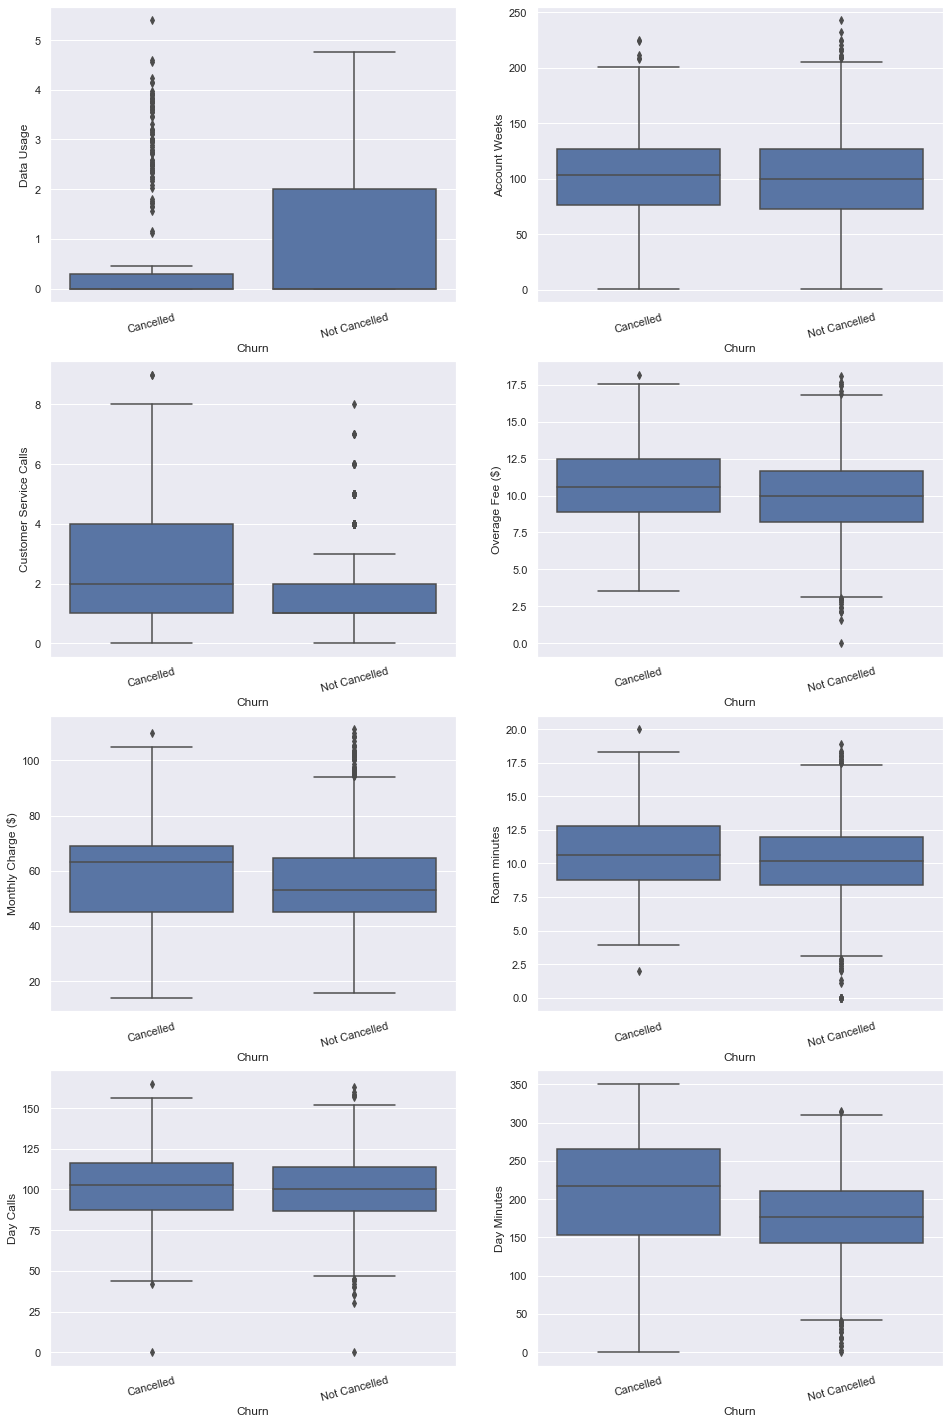

In [40]:
# Let's check the relationship between our target variable 'Churn' and other numeric variables
plt.figure(figsize=[16, 25])
base_color = sns.color_palette()[0]

plt.subplot(4, 2, 1)
sns.boxplot(data=customer_info, x='churn', y='data_usage', color=base_color)
plt.xticks(rotation=15);
plt.xlabel('Churn')
plt.ylabel('Data Usage')

plt.subplot(4, 2, 2)
sns.boxplot(data=customer_info, x='churn', y='account_weeks', color=base_color)
plt.xticks(rotation=15);
plt.xlabel('Churn')
plt.ylabel('Account Weeks')

plt.subplot(4, 2, 3)
sns.boxplot(data=customer_info, x='churn', y='customer_service_calls', color=base_color)
plt.xticks(rotation=15);
plt.xlabel('Churn')
plt.ylabel('Customer Service Calls')

plt.subplot(4, 2, 4)
sns.boxplot(data=customer_info, x='churn', y='overage_fee', color=base_color)
plt.xticks(rotation=15);
plt.xlabel('Churn')
plt.ylabel('Overage Fee ($)')

plt.subplot(4, 2, 5)
sns.boxplot(data=customer_info, x='churn', y='monthly_charge', color=base_color)
plt.xticks(rotation=15);
plt.xlabel('Churn')
plt.ylabel('Monthly Charge ($)')

plt.subplot(4, 2, 6)
sns.boxplot(data=customer_info, x='churn', y='roam_mins', color=base_color)
plt.xticks(rotation=15);
plt.xlabel('Churn')
plt.ylabel('Roam minutes')

plt.subplot(4, 2, 7)
sns.boxplot(data=customer_info, x='churn', y='day_calls', color=base_color)
plt.xticks(rotation=15);
plt.xlabel('Churn')
plt.ylabel('Day Calls')

plt.subplot(4, 2, 8)
sns.boxplot(data=customer_info, x='churn', y='day_mins', color=base_color)
plt.xticks(rotation=15);
plt.xlabel('Churn')
plt.ylabel('Day Minutes');

Looking at our violin plots between our target variable 'churn' and other numeric variables:

**For churn and data usage:** We see both median of the boxplots are at zero. We remember that more than 25000 of its customers had 0 data usage, so these customers cancelled the company's services. Then, only half of the people who use data did not cancel the company. That means some of them must have cancelled the company too. But then majority of the customers who stayed with the company had data usage.

So, we need to find a way to encourage all customers to make more subscriptions.

**For churn and account weeks:** The people who cancelled the company and the people who stayed had the active number of weeks. There is no significan difference.

**For churn and customer service calls:** The number of customers that were cancelled their contracts after they made calls to the customer service are higher thatn the number who stayed after making calls to the customer service.
    
**For churn and overage fees:** Those who were charged high overage fee were lost by the company.

**For churn and monthly charge:** The customers who were charged high monthly charges cancelled their contract and higher than the number of customers who stayed.

**For churn and roam mins:** The roam minutes of those who cancelled the company services are only slightly higher than those who stayed with the company.

**For churn and days calls:** The is no significance difference between the people who cancelled and not cancelled, as they made almost the same number of calls per day.

**For churn and day mins:** The customers who had more average day time minutes per month cancelled the company, than those who had less. This might be because they are probly charged high monthly.

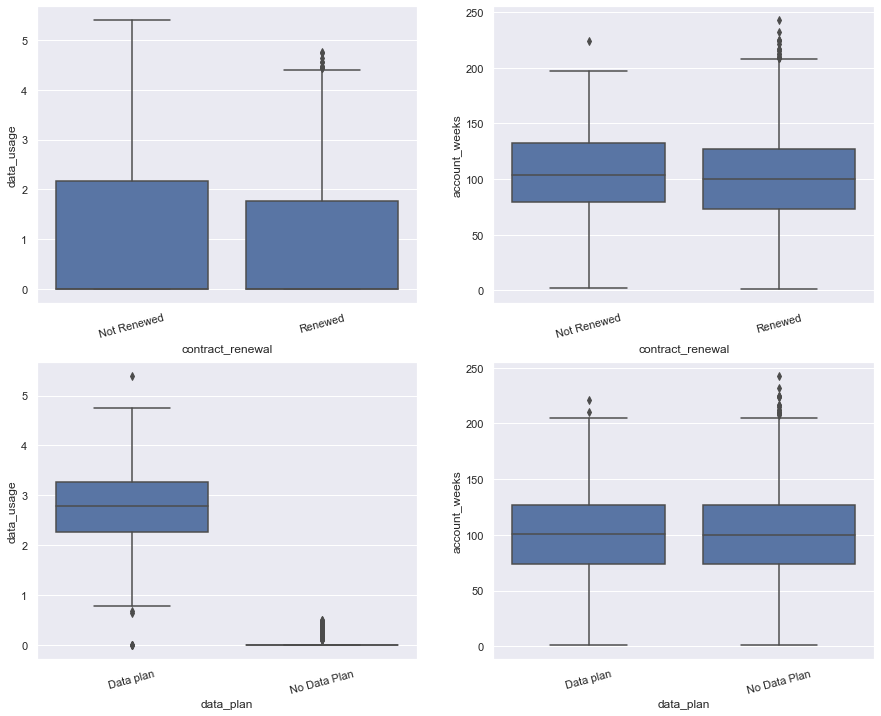

In [41]:
# Let's check the relationship between our target variable 'Churn' and other numeric variables
plt.figure(figsize=[15, 12])
base_color = sns.color_palette()[0]

plt.subplot(2, 2, 1)
sns.boxplot(data=customer_info, x='contract_renewal', y='data_usage', color=base_color)
plt.xticks(rotation=15);

plt.subplot(2, 2, 2)
sns.boxplot(data=customer_info, x='contract_renewal', y='account_weeks', color=base_color)
plt.xticks(rotation=15);

plt.subplot(2, 2, 3)
sns.boxplot(data=customer_info, x='data_plan', y='data_usage', color=base_color)
plt.xticks(rotation=15);

plt.subplot(2, 2, 4)
sns.boxplot(data=customer_info, x='data_plan', y='account_weeks', color=base_color)
plt.xticks(rotation=15);

**For data usage and contract renewal:** Most of the customers who had a high data usage did not renew their contract.
    
**For account weeks and contract renewal:** There is no significant difference between the number of customers who stayed with the company and thoose who terminated their contract with the company as both had the same number of active account weeks.

**For data usage and data plan:** The plot clearly shows that the customers with no data plan had lowest data usage and the customers who had data plan had a high data usage.
    
**For account weeks and data plan:** There is really no significant difference between the customers who had data plan and the customers who do not have data plan as both had same number of active account weeks. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

Churn was shown to have a relationship with Data plan as more people who do not have data plan cancelled the company's services more than the people who had data plan and still cancelled.

Churn also has a relationship with Contract renewal because almost have of the people who did not recently renew their contracts were lost by the company.

Churn has a relationship with customer service calls as more of the customers who made calls to the customer service were lost by the company. But why? Could something have caused it?

Customer churn were also affected by high average day time minutes per month. Also high monthly charges resulted to more customers being churned.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?
 
There was a strong correlation between data usage and monthly charge, as we saw increase in data usage leading to increase in monthly charges.

I also noticed a relationship between day mins and monthly charge. Customers who had high average day mins per month received a high monthly charge

Most of the customers who had a high data usage did not renew their contract, maybe it might due to the fact that they recieved a high monthly charge.

Lastly, the plot clearly shows that the customers with no data plan had lowest data usage and the customers who had data plan had a high data usage.

## Multivariate Analysis

The main thing I want to explore in this part of the analysis is how the three categorical (churn, data plan, and contract renewal) relate with data usage, monthly charge, day mins, and customer service calls.

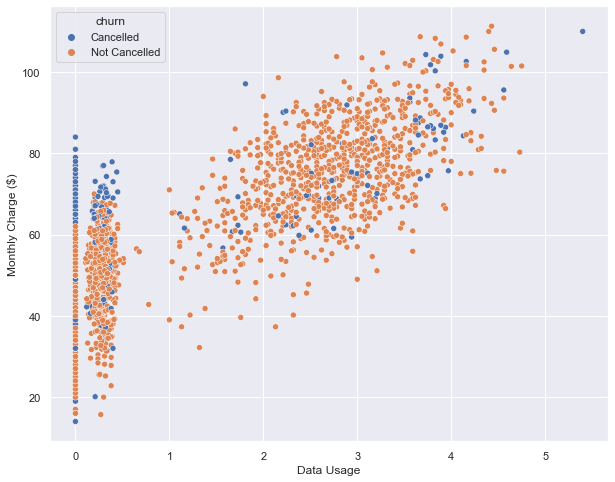

In [42]:
# Create scatterplot
plt.figure(figsize = (10, 8))
sns.scatterplot(data = customer_info, x = 'data_usage', y = 'monthly_charge', hue = 'churn');
plt.xlabel('Data Usage')
plt.ylabel('Monthly Charge ($)');

We could see that there is a positive correlation between data usage and monthly charge, and they both affect customer churn. What we can also observe is that most customers with low to no data usage but a high monthly charge left the company.

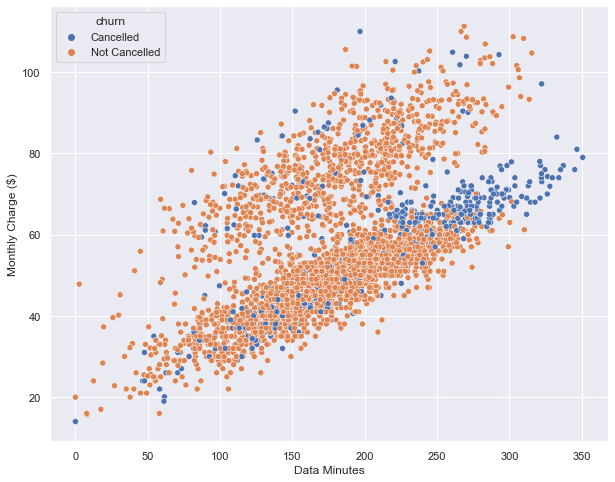

In [43]:
# Create scatterplot
plt.figure(figsize = (10, 8))
sns.scatterplot(data = customer_info, x = 'day_mins', y = 'monthly_charge', hue = 'churn');
plt.xlabel('Data Minutes')
plt.ylabel('Monthly Charge ($)');

There is also a positive relationship between the average daytime minutes per month and the monthly charge. Here we can additionally observe one surprising fact. Almost all customers with a monthly charge between 60 and 80 and average daytime minutes per month above 200 left the company. The other leavers are well distributed in this scatterplot.

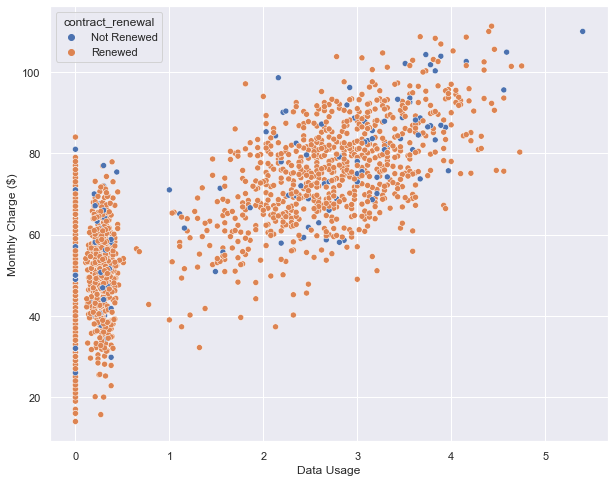

In [44]:
# Create scatterplot
plt.figure(figsize = (10, 8))
sns.scatterplot(data = customer_info, x = 'data_usage', y = 'monthly_charge', hue = 'contract_renewal', cmap='vlag');
plt.xlabel('Data Usage')
plt.ylabel('Monthly Charge ($)');

We see the sparsely scattered data points, showing few customers who do not use data and even those who use data are charged high monthly, but only few of them begins to decide not to renew their contracts.

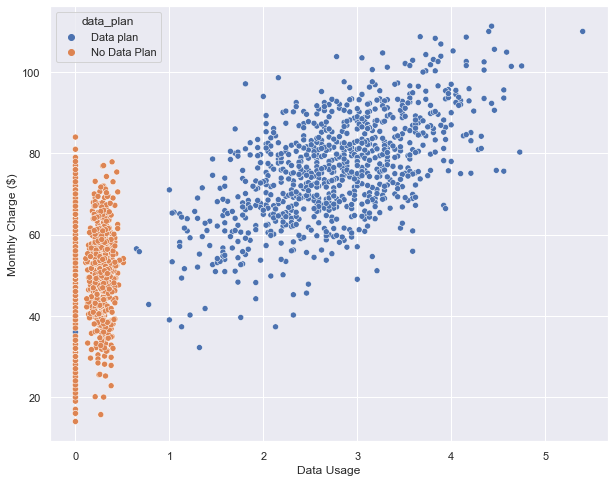

In [45]:
# Create scatterplot
plt.figure(figsize = (10, 8))
sns.scatterplot(data = customer_info, x = 'data_usage', y = 'monthly_charge', hue = 'data_plan');
plt.xlabel('Data Usage')
plt.ylabel('Monthly Charge ($)');

Here, it's clearly evident that the customers who do not use data, have no data plan but still get a high monthly charge.

In [46]:
# A function to create a bivariate barplot of two categorical variable and one numeric variable
def barplot(cat_var1, num_var, cat_var2):
    sns.barplot(data = customer_info, x = cat_var1, y = num_var, hue = cat_var2, errwidth = 0)
    plt.ylabel('{}'.format(num_var));

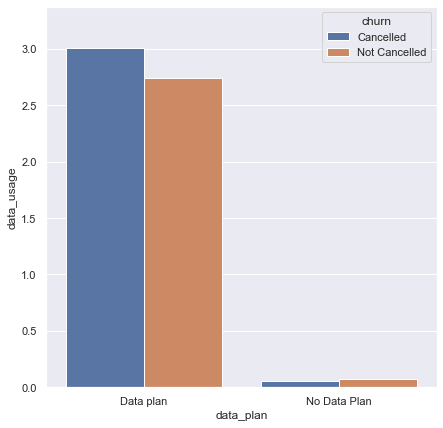

In [47]:
barplot('data_plan', 'data_usage', 'churn')

The number of customers who had data plan and high data usage were more. We could see that they also later cancelled their contracts. It might be that the data plans are not firendly.

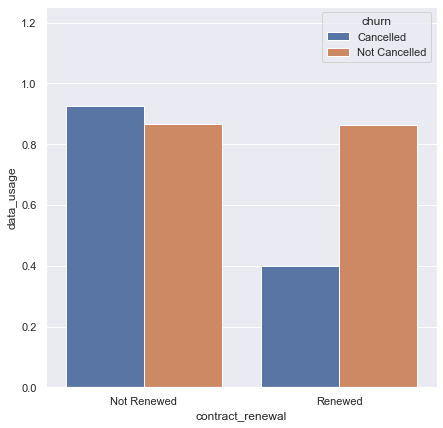

In [48]:
barplot('contract_renewal', 'data_usage', 'churn')

More of the customers had high data usage but did not renew their contracts, were eventually lost by the company. From the proof we have seeen from the data, the high data usage could have risen from high monthly charges, and which would have resulted from unfriendly data plan.

I sstill suggest the data plans should be reviewed and made more friendly.

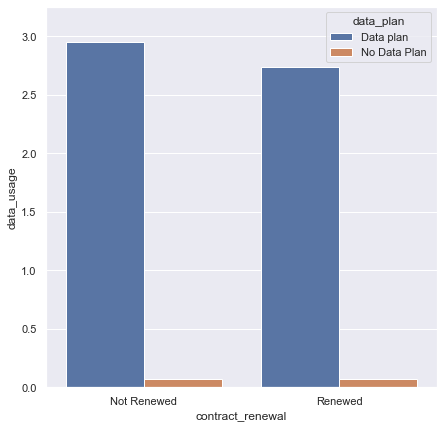

In [49]:
barplot('contract_renewal', 'data_usage', 'data_plan')

The number of customers who had data plan with high data usage, and who chose not to renew their contract are same number with people who had data plan with high data usage, and chose to stay with the company.

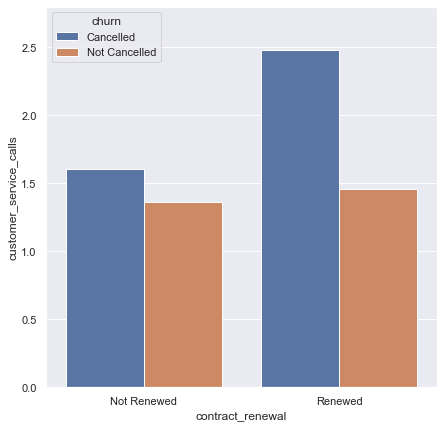

In [50]:
barplot('contract_renewal', 'customer_service_calls', 'churn')

We could see that the customers whole made an average of 2.5 calls to to customer service, had their contract renewed but they eventually left the company or cancelled the company's services.

I suggest that more improvements should be made in the customer service department.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

As predicted, there is a positive correlation between data usage and monthly charge. What we can also observe is that most customers with low to no data usage but a high monthly charge left the company.

There is also a positive relationship between the average daytime minutes per month and the monthly charge. Here we can additionally observe one surprising fact. Almost all customers with a monthly charge between 60 and 80 and average daytime minutes per month above 200 left the company. The other leavers are well distributed in this scatterplot.

We see the sparsely scattered data points, showing few customers who do not use data and even those who use data are charged high monthly, but only few of them begins to decide not to renew their contracts.


### Were there any interesting or surprising interactions between features?
It was surprising to find out that the customers who have data plan with high data usage later decided to quit the company services. Why? It might be that the monthly charge for the particular data plan they were on was quiet high. So maybe a friendly data plan can help make them stay with the company.

## Conclusion

Churn is mostly affected by high contract renewal, data plan, monthly charge, and customer service calls.

Lack of Contract renewal lead customers having low or no data plans which lead to low data usage, and which inturns yields low profit.

Variables like customer service calls also contribute to most of the customers cancelling the company's services. This probably might be due to long time spent on call and their issue not being resolved even after that. I would need more data to dig deeper into this.

High monthly charge also contributes to customer churn. This is probably caused by the high data charges on the data plans. So, I suggest that a friendly data plan be introduced or made available to the customers.

In [51]:
# Saving the cleaned dataset to a csv file
customer_info.to_csv('customer_info.csv', index=False)